In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

from pathlib import Path

file_PCNN = "Predictions_PCNNModel_old.csv"
filePath = Path("E:/Dropbox/PhD research/ANN_PBMsim\ANN_PBM/src")

datafile_DF = pd.read_csv(filePath/file_PCNN)

# print(datafile_DF.describe())

Unnamed: 0  batch_amount    liq_amount           rpm  \
count  10080.000000  10080.000000  10080.000000  10080.000000   
mean   25015.466667      0.548128      0.498661      0.497172   
std    14517.750432      0.323854      0.334721      0.343051   
min        2.000000      0.000000      0.000000      0.000000   
25%    12412.500000      0.272727      0.166667      0.200000   
50%    24832.000000      0.545455      0.500000      0.412000   
75%    37522.000000      0.818182      0.833333      0.800000   
max    50397.000000      1.000000      1.000000      1.000000   

       impellerDiameter  solidDensity  Initial_Porosity  Granule_Density  \
count      10080.000000  10080.000000      10080.000000     10080.000000   
mean           0.315917      0.500556          0.497123         0.186124   
std            0.397163      0.339577          0.353945         0.014497   
min            0.000000      0.000000          0.000000         0.156892   
25%            0.000000      0.200000      

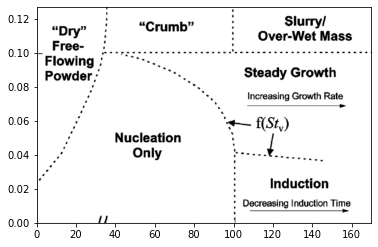

In [7]:
img = plt.imread("iveson_regimeMapClip_noAxis.png")
ext = [0.0, 170, 0.00 , 0.127]
plt.imshow(img, zorder=0, extent=ext)
aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))
plt.gca().set_aspect(aspect)

plt.show()

In [27]:
dImpeller = (np.array(datafile_DF["impellerDiameter"]*0.625)+0.125)
rpm = np.array(datafile_DF["rpm"]*500)+100
Uc = np.multiply(np.multiply(rpm,dImpeller),np.full(len(rpm),(np.pi*0.15/60)))
print(Uc)
granuleYieldStress = 1e4
Ys_arr = np.full(len(Uc),(1 / (2 * granuleYieldStress))) 
gDensity = np.array(datafile_DF["Granule_Density"]*1000) 
StDe = np.multiply(np.multiply(gDensity,np.power(Uc,2)),Ys_arr) 
from scipy import stats
print(stats.describe(StDe))

[0.58904862 0.58904862 0.58904862 ... 1.17809725 1.17809725 1.17809725]
DescribeResult(nobs=10080, minmax=(7.712026422734564e-05, 0.12653715728183423), mean=0.014371559385946255, variance=0.0007808114114564522, skewness=2.581307334890325, kurtosis=5.797625116325577)


In [29]:
minPorosity = 0.18
particleDensity = np.array(datafile_DF['solidDensity']*500) + 200
solidWt = (np.array(datafile_DF['batch_amount']*1100) + 900) / 1000
liqWt = np.array(datafile_DF['liq_amount']*600)+600
minPor_arr = np.full(len(solidWt),minPorosity)
w = 0.4 * solidWt
smax = np.divide(np.multiply(w,np.multiply(particleDensity,(1-minPor_arr))),1000*minPor_arr)
print(smax)

[ 328.          492.          656.         ... 1822.22222222 1822.22222222
 2551.11111111]
